In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib
# matplotlib.use("Agg")
import pylab
import numpy as np
import matplotlib.pyplot as plt
import yt
yt.funcs.mylog.setLevel(50) #coerce output null
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import os
os.chdir("../../project/FLASH4.3_2/object/fat1000/")
G = 6.67e-8 #cgs
a = 28730.5 #cm/s

i =0
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
lev = 5
dim = 2**(lev+3)
all_data = ds.covering_grid(level=lev, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
dens_arr =  np.array(all_data["density"])
margin = dim/3
start  = margin
end = dim-margin
cell_size = int((ds.domain_width/dim)[0].in_cgs())
print "cell size: ", cell_size
print end-start
print "looping through: ", (end-start)**3
boxlen = 1e19
ctr = boxlen/2
dr=cell_size

cell size:  39062500000000000
86
looping through:  636056


In [6]:
def plot_MR(timestep):
    # xi_range = np.logspace(-3,5)
    #xi_range = np.logspace(0,50,num=10)
    # xi_range = np.linspace(60,500,num=10)
    ds = yt.load("sod_hdf5_chk_{}".format(str(timestep).zfill(4)))
    xi_range = np.logspace(1,5,num=10)
    r_range = xi_range/1.057E-17
    #let dr = cell_size
    rcloud =1.59886e18 #xi = 16.90 (/1.057E-17 conv factor)
    xyzrange = np.arange(start,end)
    sum_args_list = []
    for ri in r_range:
#         print "Looking at radius: ", ri
        sum_args = 0
        for i in xyzrange:
            for j in xyzrange:
                for k in xyzrange:
                    r = np.sqrt((i-ctr)**2+(j-ctr)**2+(k-ctr)**2)*cell_size
                    #print r
                    if np.isclose(r,ri,atol=dr):#atol is +/-
#                     if r<ri:
                        #print "inside:" , r
                        sum_args+=r*dens_arr[i][j][k]*dr
        sum_args_list.append(sum_args)
    sum_args_list = np.array(sum_args_list)

    print sum_args_list
    plt.loglog(xi_range,4*np.pi*G*sum_args_list/rcloud/a)

[  0.00000000e+00   0.00000000e+00   1.45637418e+37   2.34162639e+39
   2.34162639e+39   2.34162639e+39   2.34162639e+39   2.34162639e+39
   2.34162639e+39   2.34162639e+39]
[  0.00000000e+00   0.00000000e+00   1.45637418e+37   2.34162639e+39
   2.34162639e+39   2.34162639e+39   2.34162639e+39   2.34162639e+39
   2.34162639e+39   2.34162639e+39]
[  0.00000000e+00   0.00000000e+00   1.45637418e+37   2.34162639e+39
   2.34162639e+39   2.34162639e+39   2.34162639e+39   2.34162639e+39
   2.34162639e+39   2.34162639e+39]
[  0.00000000e+00   0.00000000e+00   1.45637418e+37   2.34162639e+39
   2.34162639e+39   2.34162639e+39   2.34162639e+39   2.34162639e+39
   2.34162639e+39   2.34162639e+39]


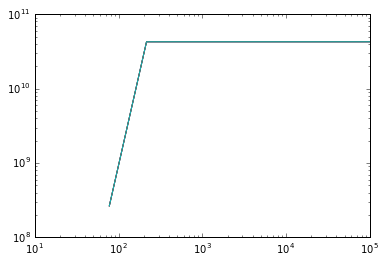

In [6]:
for i in np.arange(31):
    if i%10==0:
        plot_MR(i)

actually changing the box region from start ~end using the margin cuts versus start~end using the 0,boxlen really changes the runtime by quite a lot because there's now margin^3 more cells to loop through, but we need that for getting the estimates in larger xi region 

This took about 2 hours to run using the big box...

plt.loglog([  1.00000000e+01,   2.78255940e+01,   7.74263683e+01],[1.43507610e+18,5.89820411e+17,8.99980429e+17])

In [15]:
ctr = dim/2
dr=cell_size
timestep=1
# xi_range = np.logspace(-3,5)
#xi_range = np.logspace(0,50,num=10)
# xi_range = np.linspace(60,500,num=10)
ds = yt.load("sod_hdf5_chk_{}".format(str(timestep).zfill(4)))
r_range = xi_range/1.057E-17
#let dr = cell_size
rcloud =1.59886e18 #xi = 16.90 (/1.057E-17 conv factor)
xyzrange = np.arange(start,end)
sum_args_list = []

In [37]:
img.size

7396

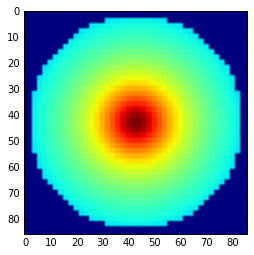

In [29]:
plt.figure()
plt.imshow()

In [31]:
xi_range

array([  1.00000000e-02,   1.47918886e-02,   2.18799968e-02,
         3.23646476e-02,   4.78734262e-02,   7.08138387e-02,
         1.04747041e-01,   1.54940657e-01,   2.29186493e-01,
         3.39010108e-01,   5.01459975e-01,   7.41754008e-01,
         1.09719427e+00,   1.62295754e+00,   2.40066071e+00,
         3.55103057e+00,   5.25264487e+00,   7.76965377e+00,
         1.14927853e+01,   1.70000000e+01])

Looking at radius:  9.46073793756e+14
Looking at radius:  1.39942181651e+15
Looking at radius:  2.07000916151e+15
Looking at radius:  3.06193449192e+15
Looking at radius:  4.52917939066e+15
Looking at radius:  6.69951169986e+15
Looking at radius:  9.90984307425e+15
Looking at radius:  1.46585294803e+16
Looking at radius:  2.16827335121e+16
Looking at radius:  3.20728578667e+16
Looking at radius:  4.74418140665e+16
Looking at radius:  7.01754028681e+16
Looking at radius:  1.03802674172e+17
Looking at radius:  1.5354375928e+17
Looking at radius:  2.27120218258e+17
Looking at radius:  3.3595369674e+17
Looking at radius:  4.96938965713e+17
Looking at radius:  7.35066582211e+17
Looking at radius:  1.08730229981e+18
Looking at radius:  1.60832544939e+18
[  9.28846930e+17   9.28846930e+17   9.28846930e+17   9.28846930e+17
   9.28846930e+17   9.28846930e+17   9.28846930e+17   9.28846930e+17
   3.55602278e+18   5.70110288e+18   7.38918851e+18   2.32084338e+19
   6.85169375e+19   1.71287161e+20 

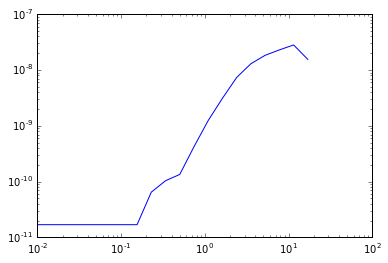

In [41]:
xi_range = np.logspace(-2,np.log10(17),num=20)
r_range = xi_range/1.057E-17
ds = yt.load("sod_hdf5_chk_{}".format(str(timestep).zfill(4)))
#let dr = cell_size
xyzrange = np.arange(start,end)
sum_args_list = []
for ri in r_range:
    print "Looking at radius: ", ri
    sum_args = 0
    for i in xyzrange:
        for j in xyzrange:
            for k in xyzrange:
                r = np.sqrt((i-ctr)**2+(j-ctr)**2+(k-ctr)**2)*cell_size
                if np.isclose(r,ri,atol=dr):#atol is +/-
#                     if r<ri:
                    #print "inside:" , r
                    sum_args+=r*dens_arr[i][j][k]*dr
    sum_args_list.append(sum_args)
sum_args_list = np.array(sum_args_list)

print sum_args_list
plt.loglog(xi_range,4*np.pi*G*sum_args_list/rcloud/a)
# plt.savefig('mass.png')

In [8]:
def plot_MR(timestep):
    print "Working on t =",timestep
    xi_range = np.logspace(-2,np.log10(17),num=20)
    r_range = xi_range/1.057E-17
    ds = yt.load("sod_hdf5_chk_{}".format(str(timestep).zfill(4)))
    #let dr = cell_size
    xyzrange = np.arange(start,end)
    sum_args_list = []
    for ri in r_range:
#         print "Looking at radius: ", ri
        sum_args = 0
        for i in xyzrange:
            for j in xyzrange:
                for k in xyzrange:
                    r = np.sqrt((i-ctr)**2+(j-ctr)**2+(k-ctr)**2)*cell_size
                    if np.isclose(r,ri,atol=dr):#atol is +/-
    #                     if r<ri:
                        #print "inside:" , r
                        sum_args+=r*dens_arr[i][j][k]*dr
        sum_args_list.append(sum_args)
    sum_args_list = np.array(sum_args_list)
    print sum_args_list
    plt.loglog(xi_range,4*np.pi*G*sum_args_list/a)
    # plt.savefig('mass.png')

In [9]:
tlst =[1]
tlst.extend(np.arange(5,31,5))

Working on t = 30
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


ValueError: Data has no positive values, and therefore can not be log-scaled.

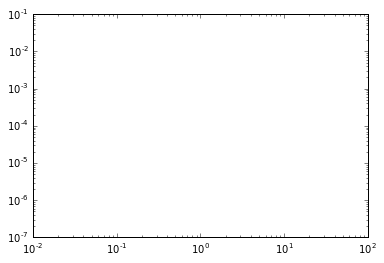

In [10]:
plot_MR(30)

In [ ]:
for t in tlst:
    plot_MR(t)